# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This is an EDA project which contains booking information of hotels. This dataset contains 119390 rows and 32 columns. The dataset has booking information for two types of hotels that is, Resort hotel and City hotel. The dataset has various columns that tell the information of total guests stayed, stays on weekend nights, stays on weekdays nights, the total number of adults, children, and babies, cancellation and non-cancellation information, repeated and non-repeated guests, lead time, Average daily rate, arrival date, month and year, different market segments, agent id, company, distribution channel, meal type, number of special requests, types of room booked and assigned, etc. The first step is to import important libraries that help in loading the data, manipulating the data, and visualizing the data. After importing the data, the basic information of the data is been viewed. Then cleaning of data is done by checking duplicate values and removing them, finding the null values and replacing them by the structure of data like filling the null values by mean, median, or mode and then altering the values of the column so that it helps in better understanding and at last various columns is been created that helps in analyzing the data. After cleaning and manipulation of data analysis is been made by plotting various types of charts and defining the analysis of the chart. At last, heatmap has been plotted to know the correlation between different variables

# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


This dataset contain various information of hotel bookings. Thus by the dataset we can get to know various results when analyzing and comparing various varaibles
some of the results we get by performing analysis are:-
* Total revenue
* Correlation between adr and total stay
* the total number of repeated and non repeated guest
* the total number of cancellation and non cancellation
* top countries with highest number of guests
* comparing diffrent market segments
* Trend in bookings across months


#### **Define Your Business Objective?**

There are multiple objectives of the business some of them are:-
* To identify the maximum source of revenue by looking at the hotel types and total number of guests stayed
* To identify the trend in bookings and ratio between cancellation and non cancellation
* To identify the ratio of its loyal customers by finding the percentage of repeated and non repeated guests
* To identify the Agents and the company that does the maximum numner of bookings
* To identify the countries with most number of guests stayed at the hotel
* To know the correlation between Average daily rate and total days of stay


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [24]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [25]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Project/Hotel Bookings.csv'
sample_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [26]:
# Dataset First Look
sample_data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
sample_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [28]:
# Dataset Rows & Columns count
sample_data.shape

(119390, 32)

### Dataset Information

In [29]:
# Dataset Info
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [30]:
# Dataset Duplicate Value Count
print('Total duplicate values in this dataset are:',len(sample_data[sample_data.duplicated()]))


Total duplicate values in this dataset are: 31994


#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
sample_data.isnull().sum().sort_values(ascending=False) 

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [32]:
  # Visualizing the missing values

#Creating series named as null_values which have 4 columns with null values
null_values= sample_data[['company','agent','country','children']].isnull().sum()
null_values

company     112593
agent        16340
country        488
children         4
dtype: int64

Text(0.5, 1.0, 'Total null values in each column')

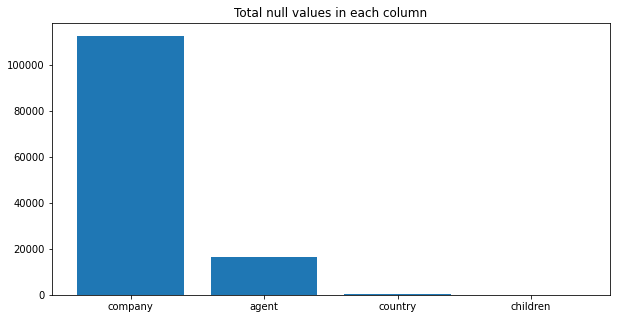

In [33]:
fig = plt.figure(figsize = (10, 5))
plt.bar(null_values.index, null_values.values)
plt.title('Total null values in each column')


### What did you know about your dataset?

* This dataset contains booking information of hotels. It has necessary information like Customer's nationality, Booking status, Reservation status, Number of people stayed, Deposit type, Average daily rate, etc. 
* This dataset contains 1119390 rows and 32 Columns.
* There are 31994 duplicate values.
* There are only 4 columns(Company, Agent, Country, Children) which contains some missing values. 

By looking at the dataset we can analyse and find insights that can be profitable to business

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
sample_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
# Dataset Describe
sample_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Variables Description 

There are 32 variables in this dataset 


1.   Hotel:- This variable tells us about the type of hotel guests have booked
2.   is_canceled:- This variable tells us whether the guest had canceled the booking or not
3.  lead_time:- The time between the reservation and actual arriavl date
4. arrival_date_year:- This variable contains the year of arrival date
5. arrival_date_month:- This variable contains the month of arrival date
6. arrival_date_week_number:- This variable contains the week number of arrival date
7. arrival_date_day_of_month:- This variable contains the date of arrival
8. stays_in_weekend_nights:- This variable contains the the number of days guest spent on weekend nights
9. stays_in_week_nights:- This variable contains the number of days guest spent on weekdays nights
10. adults:- This variable contains the number of adults stayed at hotel
11. children:- This variable contains the number of children stayed at hotel
12. babies:- This variable contains the number of babies stayed at hotel
13. meal:- This variable contains the type of meal opted by the guests 
14. country:- This variable contains the nationality of the guests
15. market_segment:- This variable contains the designation of market segments
16. distribution_channel:- This variable contains the name of booking distribution channel
17. is_repeated_guest:- This variable states whether the guest is repeated guest or not
18. previous_cancellations:- This variable states the number of times the guest cancelled the bookings
19. previous_bookings_not_canceled:- This variable states the number of times the guest has not cancelled the bookings
20. reserved_room_type:- This variable states the type of room reserved by guests
21. assigned_room_type:- This variable states the type of room assigned for the guests
22. booking_changes:- This variable contains the number of times guest had made change in booking
23. deposit_type:- This variable states the deposit type made by guests
24. agent:- This variable states the id of agent through which booking was made
25. company:- This variable contains the id of company that made the booking
26. days_in_waiting_list:- This variable states the number of days the booking was in the waiting list
27. customer_type:- This variable states the guest type
28. adr:- This variable contains the average daily rate 
29. required_car_parking_spaces:- This variable contains the number of required car parking spaces
30. total_of_special_requests:- This variable contains the number of total special requests made by guest
31. reservation_status:- This variable states the reservation status
32. reservation_status_date:- This variable contains the date at which the last reservation status was updated

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
print(sample_data.apply(lambda x : x.unique()))


hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## 3. ***Data Wrangling***


### Major steps before drawing insights from the data


* Creating a copy of data 
* Deleting duplicate rows
* Filling null values
* Replacing the values of certain columns for better understanding

### Creating a copy of original data

In [37]:
copy_df = sample_data.copy()
copy_df.shape


(119390, 32)

### Deleting duplicate rows

In [38]:
copy_df = copy_df.drop_duplicates().reset_index(drop = True)
copy_df.shape # this code will state the shape of dataframe that has no dupliactes as the duplicate values have been removed

(87396, 32)

### Filling null values

In [39]:
copy_df.isna().sum().sort_values(ascending= False)[0:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [40]:
#Checking the unique values of the company columns that has null values so that appropriate values can be filled
copy_df['company'].unique()


array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [41]:
#Since the values are the id of company that booked so there are many customers who have booked by themselves
#Hence we will be filling the null values by 0
copy_df['company'] = copy_df['company'].fillna(0)

copy_df['company'].isna().sum() #null values of company column is fixed now

0

In [42]:
#Checking the unique values of the agent columns that has null values so that appropriate values can be filled
copy_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [43]:
#Checking the unique values of the children columns that has null values so that appropriate values can be filled
copy_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [44]:
#The variable contains the number of children present and it has 0 as values this means null values are missing values due to some errors
#Hence we will replace the null values by mean value
copy_df['children'].fillna(copy_df['children'].mean(), inplace = True)


copy_df['children'].isna().sum() #null values of agent column is fixed now

0

In [45]:
#Checking the unique values of the children columns that has null values so that appropriate values can be filled
copy_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [46]:
#The variable contains the nationality and the values are in form of string
#Hence we will replace the null values with mode
copy_df['country'].mode()

0    PRT
Name: country, dtype: object

In [48]:
# Filling null values with mode
copy_df['country'].fillna('PRT', inplace = True)
copy_df['country'].isna().sum()

0

### Adding some important columns that will help in analysing the data

In [49]:
#Creating a column which tells the total number of people including adults,babies,children by adding all the columns of adults,babies,children
copy_df['total_guests'] = copy_df['adults']+copy_df['children']+copy_df['babies']
copy_df[['total_guests']].head()

,total_guests
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0


In [50]:
#Creating a column that tells the total number of days stayed at hotel by adding stays_in_weekend_nights and stays_in_week_nights
copy_df['total_nights_stayed'] = copy_df['stays_in_weekend_nights'] + copy_df['stays_in_week_nights']
copy_df[['total_nights_stayed']].head()

,total_nights_stayed
0,0
1,0
2,1
3,1
4,2


In [51]:
#Creating the columns that tells the revenue by multiplying the adr column with total_nights_stayed column
copy_df['revenue'] = copy_df['total_nights_stayed'] * copy_df['adr']
copy_df[['revenue']].head()

,revenue
0,0.0
1,0.0
2,75.0
3,75.0
4,196.0


### Replacing the values of columns to get better understanding

In [52]:
# For better inderstanding, from column 'is_repeated_guest': we will replace the value from (0,1) to not repeated, repeated.
copy_df['is_repeated_guest'] = copy_df['is_repeated_guest'].replace([0,1], ['not repeated', 'repeated'])
copy_df['is_repeated_guest'].head()


0    not repeated
1    not repeated
2    not repeated
3    not repeated
4    not repeated
Name: is_repeated_guest, dtype: object

In [53]:
# For better inderstanding, from column 'is_canceled': we will replace the value from (0,1) to not_canceled, is canceled.
copy_df['is_canceled'] = copy_df['is_canceled'].replace([0,1], ['not canceled', 'is canceled'])
copy_df['is_canceled'].head()
     

0    not canceled
1    not canceled
2    not canceled
3    not canceled
4    not canceled
Name: is_canceled, dtype: object

### What all manipulations have you done and insights you found?



* Firstly I created a copy of original dataframe
* Deleted all the duplicate rows present in the dataframe      
* Treated all the null values present in the dataframe
  1. The null values of column agent and company were replaced by 0 bcz the data present in that column states that many people have booked the hotel by themselves
  2. The null values of column children were replaced by mean bcz the nonull values already contains 0 as value this means null values were missing 
  3. The null values in column country was replaced by mode because the values in that column is in string format
* Added some important columns that will help in further analysing the data
   1. Created a column [total_guests] thats tells the total number of people stayed at the hotel
   2. Created a column [total_nights_stayed] that tells the total number of nights guests were present in the hotel
   3. Created a column [revenue] that tells the revenue generated by the hotels 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 
###Most preferred hotel type

Text(0, 0.5, ' ')

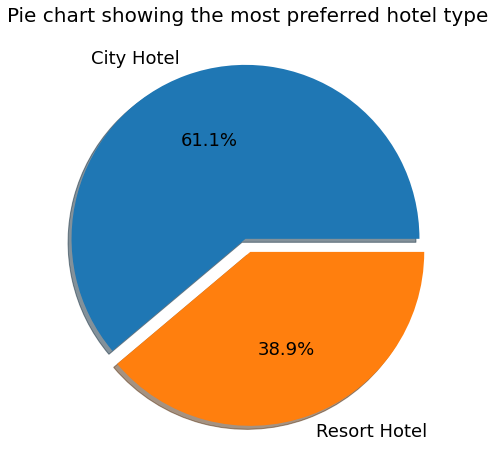

In [54]:
#plotting pie chart
copy_df['hotel'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (10,8), fontsize= 18, explode = [0.04,0.04], shadow = True)
plt.title('Pie chart showing the most preferred hotel type',fontsize = 20)
plt.ylabel(' ')

##### 1. Why did you pick the specific chart?

Pie chart helps to understand better when comparing less variables as a whole. this kind of visualization uses a circle to represent the whole,slices of that circle, or pie, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

By analysing the pie chart we can conclude that out of the given dataframe has most number of people that prefers City hotel compared to Resort hotel. Around 61.1% of people preferred City hotel over Resort Hotel

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Lot of people preferred City hotel over Resort hotel. City hotels are performing better so the city hotels can include more optional services and can charge some money to get more and more profit and can slightly increase the average daily rate.
2. There are few people who choose Resort hotel over City hotel. Maybe the services of Resort hotels are not good or maybe there are least facility available.

#### Chart - 2 

###Monthwise booking

In [55]:
#Groupby arrival date month with count of customers 
monthly_booking =copy_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Total_number_of_bookings"})

#Creating a list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# creating dataframe which will map the order of above months list without changing its values
monthly_booking['arrival_date_month']=pd.Categorical(monthly_booking['arrival_date_month'],categories=months,ordered=True)

#sorting th dataframe by months
monthly_booking=monthly_booking.sort_values('arrival_date_month')
monthly_booking


,arrival_date_month,Total_number_of_bookings
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


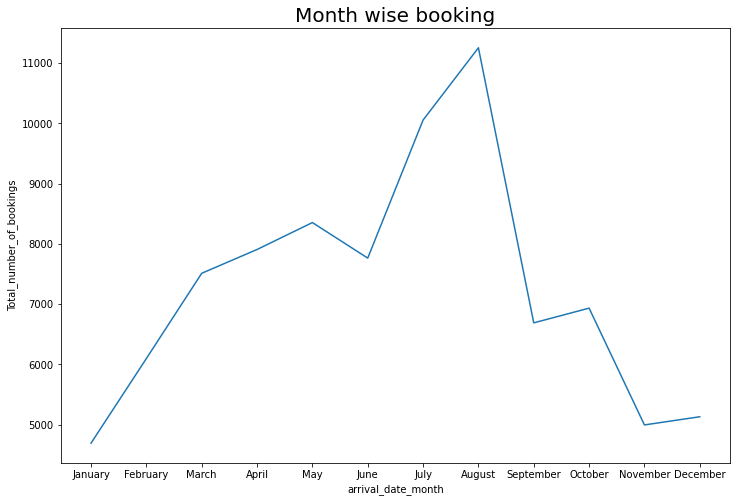

In [56]:
# set plot size
plt.figure(figsize=(12,8))

#Creating bar plot to visualize the data
fig2 =sns.lineplot(monthly_booking, x = 'arrival_date_month', y = 'Total_number_of_bookings')
plt.title('Month wise booking', fontsize = (20))
plt.show()


##### 1. Why did you pick the specific chart?

Bar graph helps to compare various variables in rectngular bars. Its easy for users to compare various variables at once

##### 2. What is/are the insight(s) found from the chart?

There are more number of bookings in August(11257) and there are lowest number bokings in January(4693) 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is sudden hike in number of bookings in July and August the hotels can generate enough revenue in these months and recover from the low revenue generated in January because of very less booking in that month 

#### Chart - 3
### Top 10 Countries with highest number of guests

In [57]:
#creating a variable that contains total number of guest from each countries and selecting only top 10
top_10= copy_df['country'].value_counts()[:10]
top_10

PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with highest number of guests')

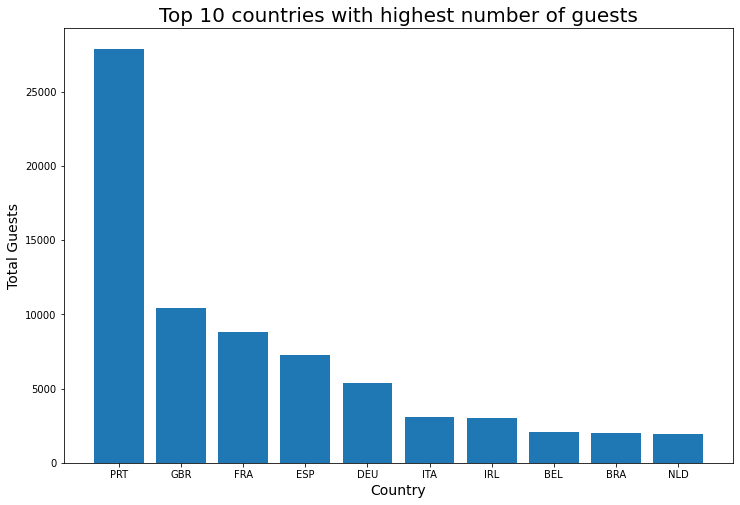

In [58]:
#plotting bar graph of top 10 countries with highest number of guests
plt.figure(figsize=(12,8))
plt.bar(top_10.index, top_10.values)
plt.xlabel('Country', fontsize = (14))
plt.ylabel('Total Guests', fontsize = (14))
plt.title('Top 10 countries with highest number of guests', fontsize = (20))


##### 1. Why did you pick the specific chart?

Bar graph helps us compare various variable at once

##### 2. What is/are the insight(s) found from the chart?

The bar graph tells us that there are maximum number of guests from Portugal and there very few guests from Netherlands

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The maximun guests are from Portugal so the hotels can lay some more offer to the people of Portugal to attract additional guests.

There are very few guests from Netherlands. The hotels should try to include some services which attract the native people of Netherlands.

#### Chart - 4
### Comparision of guests staying in weekend nights and week nights

In [60]:
#creating a list of total number of stays on weekend nights and week nights
values = ([copy_df['stays_in_weekend_nights'].sum(),copy_df['stays_in_week_nights'].sum()])
values


[87856, 229449]

In [61]:
#Creating labels to plot on pie chart
labels = ('stays_in_weekend_nights', 'stays_in_week_nights')
labels

('stays_in_weekend_nights', 'stays_in_week_nights')

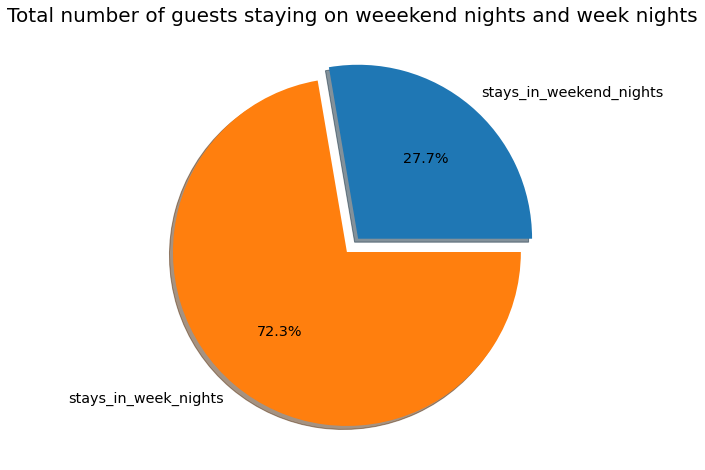

In [62]:
#Plotting pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(values,labels=labels,autopct = '%1.1f%%', textprops={'size': 'x-large'},explode =[0.05,0.05],shadow= True)
plt.title('Total number of guests staying on weeekend nights and week nights',fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart helps to compare two variables as a whole to get overall percentage of the variables

##### 2. What is/are the insight(s) found from the chart?

There are around 72.3% guests who prefers to stay at week nights and around 27.7% who prefers to stay at weekend nights

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are lot of guests who prefer to stay at week nights compared to weekend nights. People prefer to enjoy and celebrate on weekend nights. Hotels can add services like arranging parties, discount on food items, etc to attract people so that they can stay and enjoy the weekend night



#### Chart - 5
### Repeated guests

Text(0, 0.5, ' ')

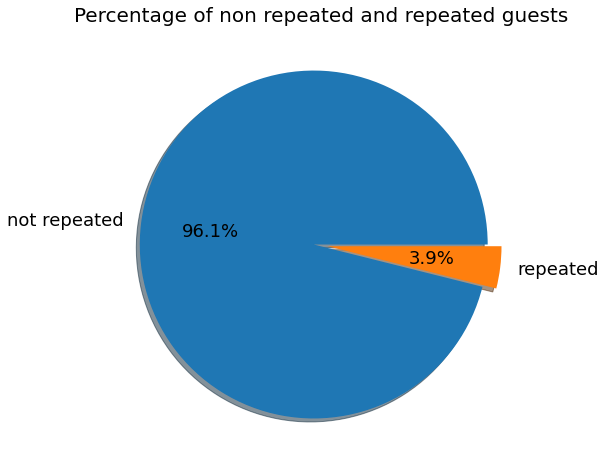

In [63]:
#creating pie chart that tells the percentage of not repeated and repeated guests
copy_df['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%',figsize = (10,8), fontsize= 18, explode = [0.04,0.04], shadow = True)
plt.title('Percentage of non repeated and repeated guests',fontsize = 20)
plt.ylabel(' ')

##### 1. Why did you pick the specific chart?

Pie chart helps to compare two variables as whole 

##### 2. What is/are the insight(s) found from the chart?

There are around 96.1% of non repeated guest and only 3.9% of repeated guest

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Very few guest are repeated customers. There are lot of new guests which is a positive factor but the hotels should improve their services and hospitality so that it will create a brand value and these number of repeated guests will increase

#### Chart - 6

### Cancellation and Non Cancellation of bookings

Text(0.5, 1.0, 'Percentage of cancellation and non-cancellation of bookings')

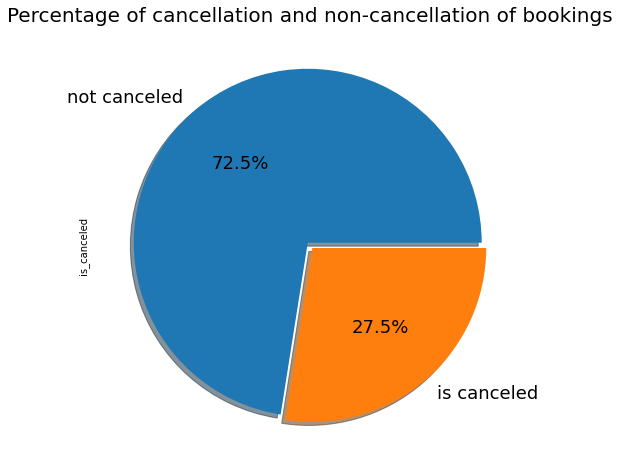

In [64]:
#Plotting pie chart that tells the percentage of non cancelled and cancelled bookings
copy_df['is_canceled'].value_counts().plot.pie(autopct = '%1.1f%%',figsize=(10,8),explode =[0.02,0.02],shadow= True,fontsize = 18)
plt.title('Percentage of cancellation and non-cancellation of bookings',fontsize = 20)



##### 1. Why did you pick the specific chart?

Pie chart helps to compare two variable as whole 

##### 2. What is/are the insight(s) found from the chart?

Around 72.5% bookings are not cancelled and 27.5% people cancelled the bookings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Around One fourth of people cancelled the bookings. Hotel must try to decrease these figures by asking their customers the reason for cancellation and imporve accordingly

#### Chart - 7

### Guests from diffrent Market segments

In [65]:
#Creating variable that has total number of guests from diffrent market segments
diff_market_segments = copy_df['market_segment'].value_counts()
diff_market_segments

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Guests from diffrent market segments')

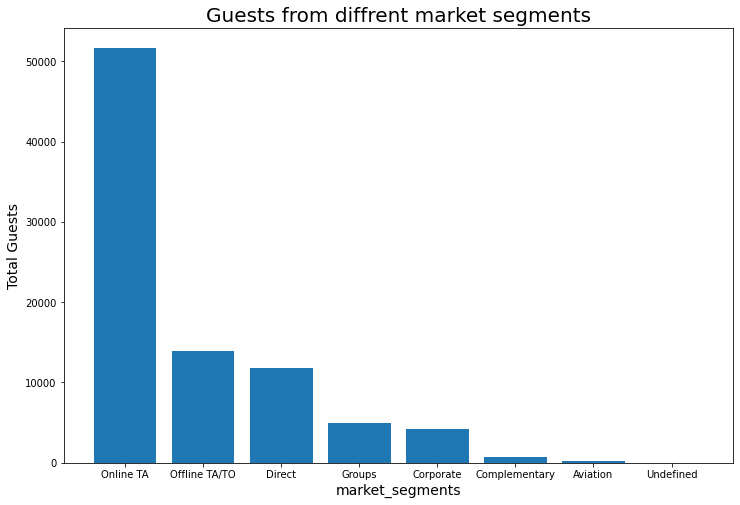

In [66]:
# Plotting bar graph which tells the total number of guests from diffrent market segments
plt.figure(figsize=(12,8))
plt.bar(diff_market_segments.index, diff_market_segments.values)
plt.xlabel('market_segments', fontsize = (14))
plt.ylabel('Total Guests', fontsize = (14))
plt.title('Guests from diffrent market segments', fontsize = (20))

##### 1. Why did you pick the specific chart?

Bar graph helps to compare various variables at once

##### 2. What is/are the insight(s) found from the chart?

Most of the guest are from Online TA market segment 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Online TA market segment has highest guest which is positive factor

#### Chart - 8
### Top 10 Agents with most number of bookings made

In [67]:
#Creating a columns to get total number of bookings done by agents
agent_with_max_booking = copy_df['agent'].value_counts().reset_index().rename(columns= {'index':'agent_id','agent':'total_bookings'}).sort_values(by= 'total_bookings', ascending = False)

#dropping 0 in column(agent_id) bcz the value 0 states that the booking was not done by any agents
agent_with_max_booking.drop(agent_with_max_booking[agent_with_max_booking['agent_id']==0].index, inplace = True)

#selecting top 10 agents with max bookings
agent_with_max_booking = agent_with_max_booking[:10]

In [68]:
agent_with_max_booking

,agent_id,total_bookings
0,9.0,28759
1,240.0,13028
2,14.0,3349
3,7.0,3300
4,250.0,2779
5,241.0,1644
6,28.0,1502
7,8.0,1383
8,1.0,1232
9,6.0,1117


Text(0.5, 1.0, 'Most number of bookings by agent id')

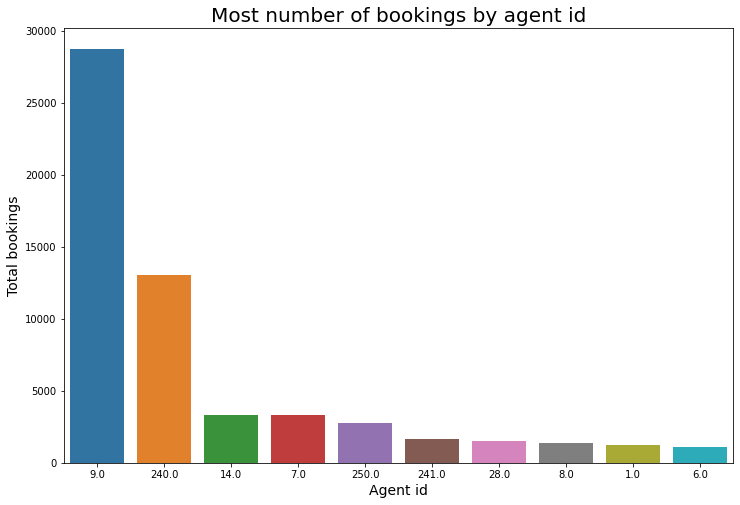

In [69]:
#Plottting bar graph
plt.figure(figsize=(12,8))
sns.barplot(x=agent_with_max_booking['agent_id'],y=agent_with_max_booking['total_bookings'],order=agent_with_max_booking['agent_id'])
plt.xlabel('Agent id', fontsize=14)
plt.ylabel('Total bookings', fontsize=14)
plt.title('Most number of bookings by agent id', fontsize=20)


##### 1. Why did you pick the specific chart?

Bar plot is best to compare various variable according to their performance.

##### 2. What is/are the insight(s) found from the chart?

Agent id(9) had done the highest booking of 28,759 follwed by agent id(240,14,7,250,241,28,8,1,6)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Agents other than agent_id(9) should be given more commission according to the number of bookings they made so that they will book hotels more usually for guests

#### Chart - 9
###  Monthwise revenue generated 

In [70]:
#Creating variable with monthwise revenue
monthly_revenue = copy_df.groupby(['arrival_date_month'])['revenue'].sum().reset_index().rename(columns={'revenue':"Total_revenue"})

#Creating variable which has months in order and making th order by monthwise
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'],categories=months,ordered=True)

#sooting by month
monthly_revenue = monthly_revenue.sort_values('arrival_date_month')


Text(0.5, 1.0, 'Monthwise revenue generated')

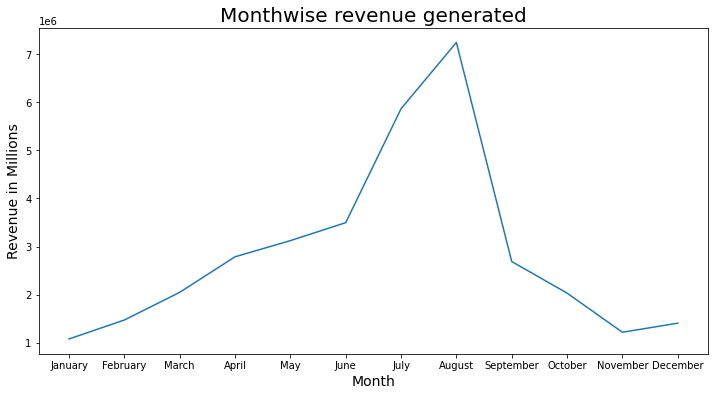

In [71]:
#Creating lineplot plot to visualize the data
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_revenue['arrival_date_month'],y=monthly_revenue['Total_revenue'])
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue in Millions', fontsize=14)
plt.title('Monthwise revenue generated', fontsize=20)


##### 1. Why did you pick the specific chart?

Line chart helps to plot various variable on graph and it is used mostly to find the trends

##### 2. What is/are the insight(s) found from the chart?

There is upper trend in revenue from January till August and after that there is decrease in trend of revenue generated

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The revenue generated is increasing every month and a positive trend till August and there is sudden downfall of revenue after August.
Hotels can utilize the money generated in January to August in developing their services so that there will be a positive change in revenue in last 4 months

#### Chart - 10
### Revenue generated by diffrent types of hotel

In [72]:
#Total revenue of city hotel and resort hotel
Revenue_generated = copy_df.groupby('hotel')['revenue'].sum()
Revenue_generated

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Revenue generated by diffrent types of hotels')

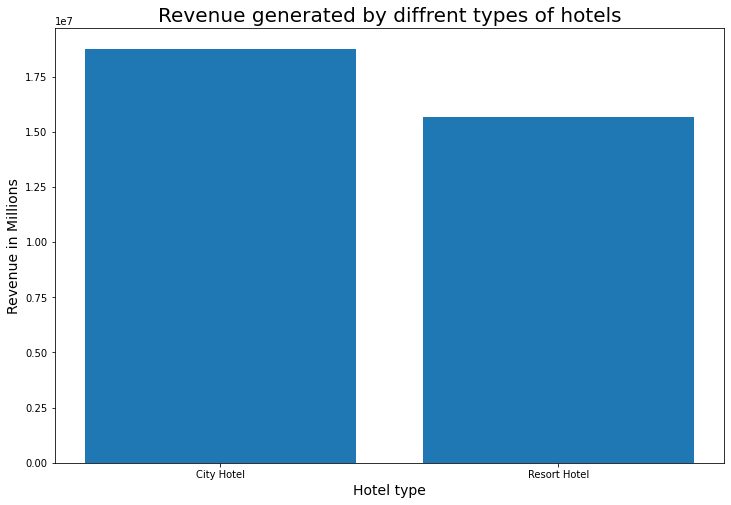

In [73]:
#plotting bar graph
plt.figure(figsize=(12,8))
plt.bar(Revenue_generated.index, Revenue_generated.values)
plt.xlabel('Hotel type', fontsize = (14))
plt.ylabel('Revenue in Millions', fontsize = (14))
plt.title('Revenue generated by diffrent types of hotels', fontsize = (20))

##### 1. Why did you pick the specific chart?

Bar graph helps to compare variables and displays the data

##### 2. What is/are the insight(s) found from the chart?

City hotel generates 18.7741 million revenue and resort hotel generates 15.68684 million revenue

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

City hotels are performming better and generating highest revenue when compared to Resort hotels. Resort hotels must add more services and provide facilities like city hotels to attract more customers

#### Chart - 11

In [75]:
#Catng a variable that contains the mean of ADR of diffrent type of hotels
Average_daily_rate = copy_df.groupby('hotel')['adr'].mean()
Average_daily_rate

hotel
City Hotel      110.985944
Resort Hotel     99.025346
Name: adr, dtype: float64

Text(0.5, 1.0, 'Average daily rate of diffrent hotel type')

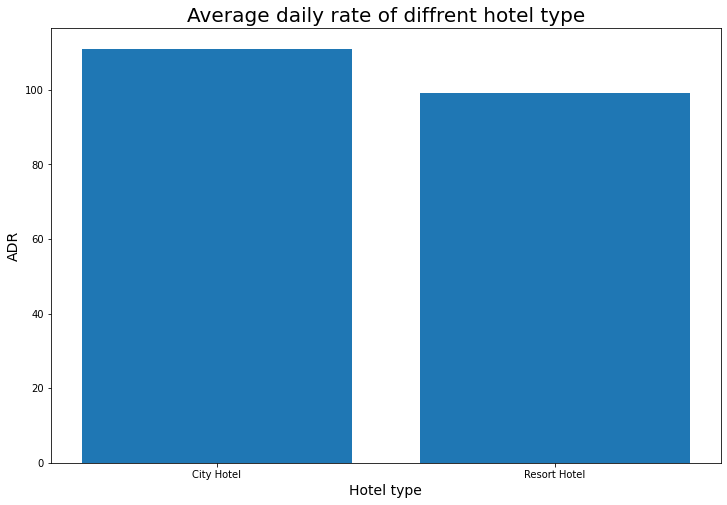

In [76]:
#plotting bar graph
plt.figure(figsize=(12,8))
plt.bar(Average_daily_rate.index, Average_daily_rate.values)
plt.xlabel('Hotel type', fontsize = (14))
plt.ylabel('ADR', fontsize = (14))
plt.title('Average daily rate of diffrent hotel type', fontsize = (20))

##### 1. Why did you pick the specific chart?

Bar graph helps to compare variables and displays the data

##### 2. What is/are the insight(s) found from the chart?

Average daily rate of City hotels is 110.9859 and resort hotel is 99.0253

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at the ADR Resort hotels are cheaper when compared to city hotels. 

#### Chart - 12 - Pair Plot 
# Relationship between Adr and Total nights stayed

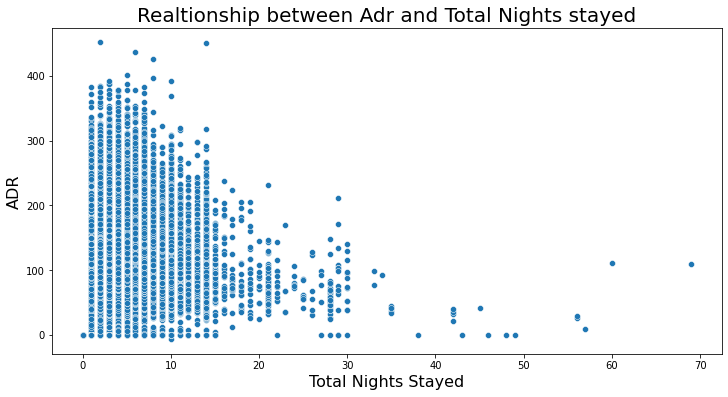

In [77]:
# Pair Plot visualization code
plt.figure(figsize = (12,6))

#Creating dataframe where adr is less than 500
df_2 = copy_df[copy_df['adr']<500]

#Plotting scatterplot
sns.scatterplot(y = 'adr', x = 'total_nights_stayed', data = df_2)
plt.xlabel('Total Nights Stayed', fontsize=16);
plt.ylabel('ADR', fontsize=16);
plt.title('Realtionship between Adr and Total Nights stayed', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot allows to plot pairwsie relationship between two variables

##### 2. What is/are the insight(s) found from the chart?

There is negative correlation between adr and total night stayed this means the Adr is high when there is short stays. The hotels should look for these type of short stays customers to generate more revenue

#### Chart - 13 - Correlation Heatmap

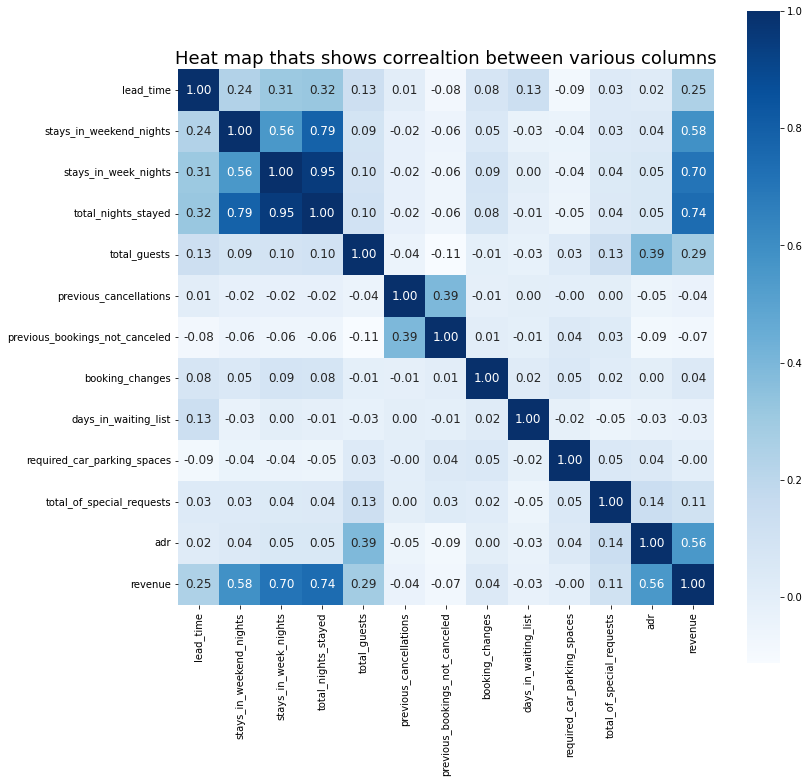

In [78]:
# Correlation Heatmap visualization code

#creating dataframe that has the values only in integer and floats
corr_columns = copy_df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','total_nights_stayed','total_guests','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests','adr','revenue']]

#Finding the correaltion of each columns
correaltion = corr_columns.corr()

#Plotting heatmap
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(correaltion, annot = True, fmt='.2f', annot_kws={'size': 12},  vmax=1, square=True, cmap="Blues")
ax.set_title('Heat map thats shows correaltion between various columns', fontsize = (18))
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap allows to compare various variables which contains numerical value and shows the correaltion between the varibles 

##### 2. What is/are the insight(s) found from the chart?



*   lead time shows the positive correlation with stays in weekend nights and stays in week nights and total nights stayed. This means the longer the stay the more will be lead time

*   Adr is positively correalted with total guests that means higher the total number the guests the adr will increase


* Revenue show positive correaltion with lead time, stays in weekend nights, stays in week nights, total nights stayed, total guest which tells us that hotel generated more and more revenue when the number of these variables increase



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 


Some of the points to achieve the business objective are:-
1. Most of the people around (61.9%) prefer City hotels over Resort hotels. City hotel generates more revenue than Resort hotel. The business firm should compare the facilities of City hotels and Resort hotels to bridge the gap between these preferences.
2. There is an upward trend in bookings from January to July and August and, there is a downward trend from August. The maximum booking is in the month of August. The hotels can add more optional paid services in these peak seasons to generate more revenue. In the month of September to December when there is a downward trend in bookings hotels can upgrade or renovate their non-booked rooms.
3. The top 10 countries from where the guests stay at the hotel are PRT, GBR, FRA, ESP, DUE, ITA, IRL, BEL, BRA, and NLD. The highest number of guests that visit the hotel are from Portugal. The hotels can add Portugal meals, advertise, especially in Portugal to attract more guests and can generate more revenue.
Even the hotels can run marketing ads in these top 10 countries so that we can see an upward trend in the bookings
4. 72.3 %of people prefer to stay on weeknights, and only 27.7% people prefer to stay on weekend nights. Most people try to celebrate and enjoy themselves on weekend, so the hotels can add services like arranging parties, birthday and anniversary celebrations, optional tours on Sundays, extra discounts on weekends, etc so that most of the people will prefer to stay on weekend nights because they can enjoy their weekend parties in the hotel itself.
5. Around 96.1% of the guest are non-repeated. This indicates that there are a lot of new guests visiting. But, only 3.9% of guests are repeated. At the time of checkout, the hotels should take feedback from their guests and try to implement it accordingly so that we can see these repeated guests will increase gradually.
6. 72.5% of people have not canceled the bookings. This is a good sign but there are 27.5% of guests have canceled the bookings. These numbers can be reduced by asking the guest's reason for canceling and offering them a discount on the next visit.
7. Agent id 9 has done the most number of bookings. Thus this agent should be rewarded so that the loyalty for the business will increase in the eye of that agent and thus he will maintain these good number of bookings
8. There is a negative correlation between ADR and total nights stayed. This means ADR does not increase when there are longer stays. The hotels should focus on guests with short stays to generate more revenue
9. August month generates the highest revenue. The hotels should focus on this month and the hotels can utilize these funds in marketing or improving their services.

# **Conclusion**

By analyzing the data we can conclude that City hotels generates more revenue and preferred by most of the people. Thus city hotels ADR is high and peak season is in July and August.
There are very few repeated guests
and One fourth of customers are cancelling the bookings